In [1]:
import pandas as pd
import numpy as np
from generate import *

pd.set_option('display.max_columns', None)  # Set to None to display all rows
df = pd.read_csv('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/Overall/old/overall_combined_old.csv')

In [30]:
df

,cluster_id,ccf_acronym,ccf_name,ccf_parent_id,ccf_parent_acronym,ccf_parent_name,spike_times,mouse_id,context,event,pre_spikes,post_spikes,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,pre_time,post_time,area_acronym,has context
0,1,CA3,Field CA3,375.0,CA,Ammon's horn,[1.10997831e-02 3.79359254e-01 4.41958031e-01 ...,AB120_20240811_143102,active,whisker,[ 4 3 1 1 4 8 4 6 2 4 5 3 2 5 3 ...,[2 3 5 3 7 2 5 6 3 4 4 4 5 6 5 3 2 7 5 5 3 5 5...,0.511540,0.023079,0.821,0.179,False,none,0.2,0.2,CA3,False
1,5,CA3,Field CA3,375.0,CA,Ammon's horn,[8.50683378e-01 8.61316503e-01 8.73749594e-01 ...,AB120_20240811_143102,active,whisker,[ 5 4 3 0 1 7 1 0 1 7 6 1 2 4 3 ...,[ 5 2 8 0 7 3 1 6 5 6 5 2 6 4 6 ...,0.496881,-0.006239,0.863,0.137,False,none,0.2,0.2,CA3,False
2,9,CA3,Field CA3,375.0,CA,Ammon's horn,[8.57983235e-02 1.90962935e-01 2.93227604e-01 ...,AB120_20240811_143102,active,whisker,[1 2 2 0 0 2 6 4 0 4 2 0 0 1 1 3 0 3 0 3 0 2 3...,[5 1 7 2 4 3 2 3 3 2 5 1 2 5 2 1 2 1 0 1 0 1 2...,0.498041,-0.003917,0.878,0.122,False,none,0.2,0.2,CA3,False
3,12,CA3,Field CA3,375.0,CA,Ammon's horn,[8.19650651e-02 1.73179949e+00 2.62854864e+00 ...,AB120_20240811_143102,active,whisker,[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0...,[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 3 2 0 0 0 0 0 0...,0.488184,-0.023633,0.788,0.234,False,none,0.2,0.2,CA3,False
4,14,CA3,Field CA3,375.0,CA,Ammon's horn,[4.24688368e+00 5.92881749e+00 6.04198194e+00 ...,AB120_20240811_143102,active,whisker,[0 1 1 0 1 0 0 1 0 1 2 2 2 2 2 0 2 1 1 5 3 1 2...,[1 0 0 1 1 0 0 1 2 1 0 1 0 0 1 6 2 3 3 3 1 4 4...,0.477341,-0.045318,0.850,0.150,False,none,0.2,0.2,CA3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102955,644,SSp-m6a,"Primary somatosensory area, mouth, layer 6a",345.0,SSp-m,"Primary somatosensory area, mouth",[4.82992796e-02 3.64093569e+00 4.10362446e+00 ...,AB107_20240318_121423,active,spontaneous_licks,[0 0 0 0 0 1 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 3 0...,[0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0...,0.457162,-0.085676,0.002,0.998,True,positive,0.2,0.2,SSp-m,True
102956,646,SSp-m6a,"Primary somatosensory area, mouth, layer 6a",345.0,SSp-m,"Primary somatosensory area, mouth",[ 4.45451922 5.01817748 5.58706533 ...,AB107_20240318_121423,active,spontaneous_licks,[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0.492889,-0.014222,0.247,0.780,False,none,0.2,0.2,SSp-m,True
102957,647,SSp-m6a,"Primary somatosensory area, mouth, layer 6a",345.0,SSp-m,"Primary somatosensory area, mouth",[3.12295342e-01 3.82394296e-01 5.38191972e-01 ...,AB107_20240318_121423,active,spontaneous_licks,[3 1 2 1 4 3 1 2 2 2 2 0 6 2 1 0 2 0 3 1 1 5 3...,[6 3 3 1 2 2 0 0 0 1 0 0 1 2 1 1 1 1 0 1 2 2 1...,0.381798,-0.236403,0.000,1.000,True,positive,0.2,0.2,SSp-m,True
102958,650,SSp-m5,"Primary somatosensory area, mouth, layer 5",345.0,SSp-m,"Primary somatosensory area, mouth",[1.98969965e+00 2.33309120e+00 3.46880493e+00 ...,AB107_20240318_121423,active,spontaneous_licks,[0 0 0 1 0 2 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0...,[1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0...,0.539936,0.079872,0.983,0.018,True,negative,0.2,0.2,SSp-m,True


In [26]:
df[df['has context']==True].mouse_id.unique()

array(['AB077_20230531_143839', 'AB080_20230622_152205',
       'AB082_20230630_101353', 'AB085_20231005_152636',
       'AB086_20231015_141742', 'AB087_20231017_141901',
       'AB092_20231205_140109', 'AB093_20231207_111207',
       'AB095_20231212_141728', 'AB102_20240309_114107',
       'AB104_20240313_145433', 'AB107_20240318_121423'], dtype=object)

### Few examples of why 100%

In [20]:
df[(df['context']=='passive') & (df['event']=='auditory') & (df['area_acronym']=='SEZ')]

,cluster_id,ccf_acronym,ccf_name,ccf_parent_id,ccf_parent_acronym,ccf_parent_name,spike_times,mouse_id,context,event,pre_spikes,post_spikes,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,pre_time,post_time,area_acronym,has context
76451,69,SEZ,subependymal zone,81.0,VL,lateral ventricle,[9.64348553e-01 1.00834774e+00 1.08111307e+00 ...,AB116_20240724_102941,passive,auditory,[0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 0 1 0 0 0 0 0...,[0 3 0 0 1 0 0 0 0 1 1 2 1 1 0 0 0 0 0 1 0 1 0...,0.55275,0.105499,0.034,0.967,True,positive,0.2,0.2,SEZ,False


In [21]:
df[(df['context']=='passive') & (df['event']=='whisker') & (df['area_acronym']=='SEZ')]

,cluster_id,ccf_acronym,ccf_name,ccf_parent_id,ccf_parent_acronym,ccf_parent_name,spike_times,mouse_id,context,event,pre_spikes,post_spikes,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,pre_time,post_time,area_acronym,has context
75063,69,SEZ,subependymal zone,81.0,VL,lateral ventricle,[9.64348553e-01 1.00834774e+00 1.08111307e+00 ...,AB116_20240724_102941,passive,whisker,[0 0 0 1 0 1 3 2 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2...,[1 0 1 2 1 1 1 3 2 0 1 1 0 1 3 0 0 2 0 1 3 1 1...,0.55275,0.105499,0.996,0.004,True,negative,0.2,0.2,SEZ,False


In [22]:
df[(df['context']=='passive') & (df['event']=='wh_vs_aud') & (df['area_acronym']=='SEZ')]

,cluster_id,ccf_acronym,ccf_name,ccf_parent_id,ccf_parent_acronym,ccf_parent_name,spike_times,mouse_id,context,event,pre_spikes,post_spikes,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,pre_time,post_time,area_acronym,has context
77839,69,SEZ,subependymal zone,81.0,VL,lateral ventricle,[9.64348553e-01 1.00834774e+00 1.08111307e+00 ...,AB116_20240724_102941,passive,wh_vs_aud,[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1...,[1 1 2 1 0 1 0 1 0 0 3 0 0 0 1 0 1 3 0 3 0 0 0...,0.245561,-0.508878,0.0,1.0,True,positive,0.2,0.2,SEZ,False


In [23]:
df[(df['context']=='passive') & (df['event']=='wh_vs_aud') & (df['area_acronym']=='MB')]

,cluster_id,ccf_acronym,ccf_name,ccf_parent_id,ccf_parent_acronym,ccf_parent_name,spike_times,mouse_id,context,event,pre_spikes,post_spikes,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,pre_time,post_time,area_acronym,has context
43422,102,MB,Midbrain,343.0,BS,Brain stem,[1.06471240e+00 3.41180140e+00 7.03389746e+00 ...,AB129_20240828_112850,passive,wh_vs_aud,[2 4 3 0 0 1 0 2 1 2 3 0 8 8 6 4 6 4 8 4 6 5 3...,[ 5 3 6 4 14 0 5 4 11 4 6 5 8 5 7 ...,0.333615,-0.332770,0.002,0.998,True,positive,0.2,0.2,MB,False
43423,104,MB,Midbrain,343.0,BS,Brain stem,[7.49327900e-02 1.88997107e-01 2.43795979e-01 ...,AB129_20240828_112850,passive,wh_vs_aud,[10 8 11 10 11 10 12 12 9 7 10 8 11 8 8 ...,[ 8 13 7 12 11 12 6 9 7 4 11 7 9 10 4 ...,0.795819,0.591639,1.000,0.000,True,negative,0.2,0.2,MB,False
43424,105,MB,Midbrain,343.0,BS,Brain stem,[5.82664666e-02 8.97324852e-02 3.76559911e-01 ...,AB129_20240828_112850,passive,wh_vs_aud,[ 6 7 6 5 8 5 9 5 5 6 7 6 8 6 5 ...,[3 5 4 6 7 6 2 7 2 5 9 5 7 3 1 7 5 3 2 0 3 5 5...,0.858108,0.716216,1.000,0.000,True,negative,0.2,0.2,MB,False
43425,106,MB,Midbrain,343.0,BS,Brain stem,[ 9.42511821 9.49848337 13.45330758 ......,AB129_20240828_112850,passive,wh_vs_aud,[5 5 3 4 2 3 5 8 4 6 6 5 4 6 6 6 5 5 4 8 5 8 7...,[ 5 3 3 6 4 3 0 4 0 6 6 3 1 6 1 ...,0.894426,0.788851,1.000,0.000,True,negative,0.2,0.2,MB,False


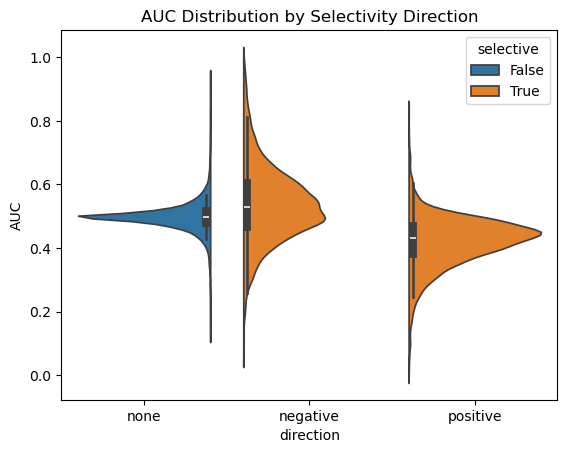

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=df, x='direction', y='AUC', hue='selective', split=True)
plt.title('AUC Distribution by Selectivity Direction')
plt.show()

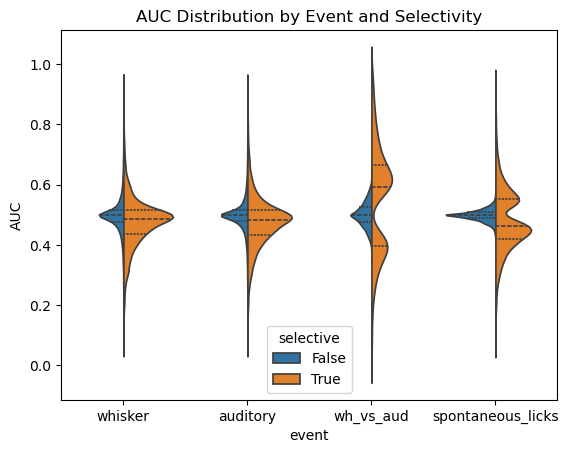

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot with the event as hue, split by selectivity
sns.violinplot(data=df, x='event', y='AUC', hue='selective', split=True, inner='quart')
plt.title('AUC Distribution by Event and Selectivity')
plt.show()


/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


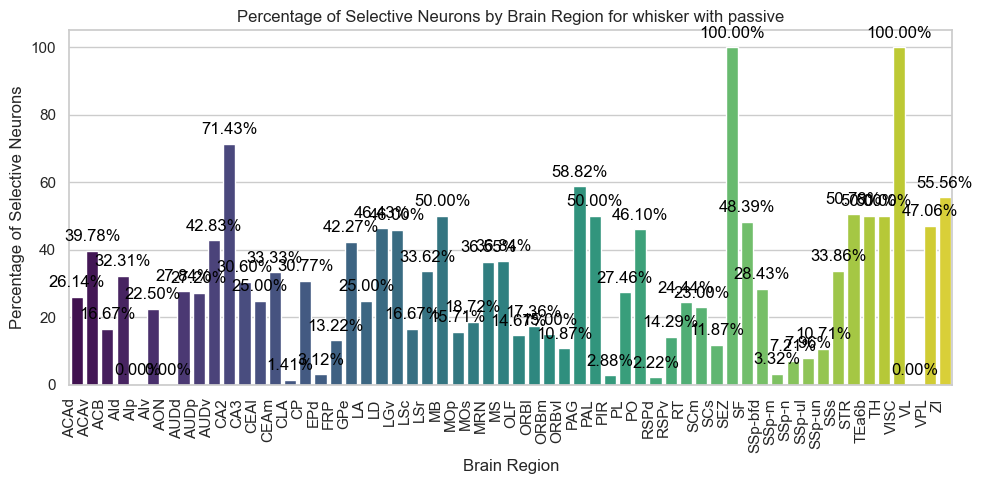

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


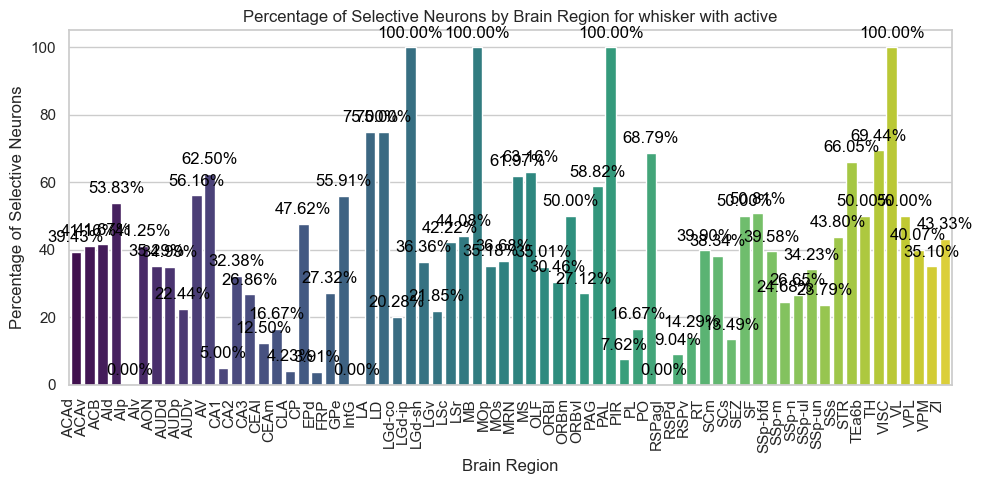

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


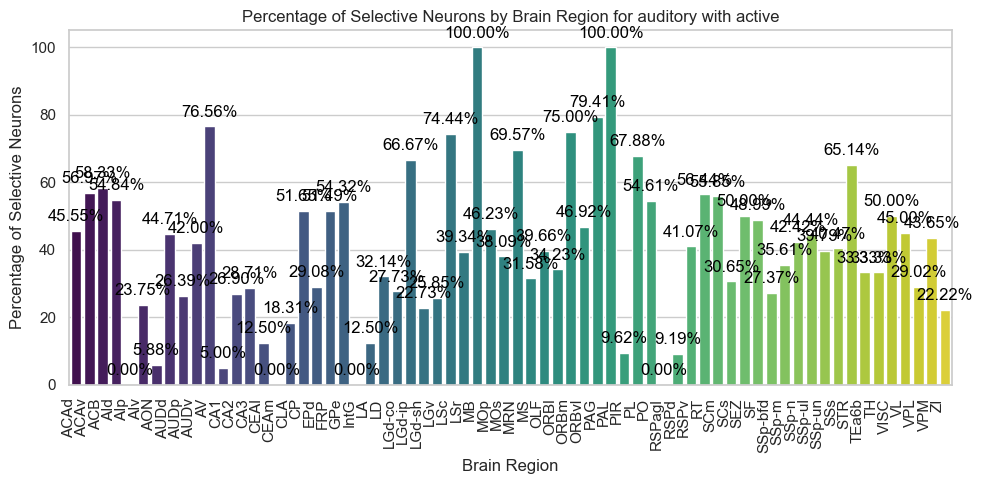

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


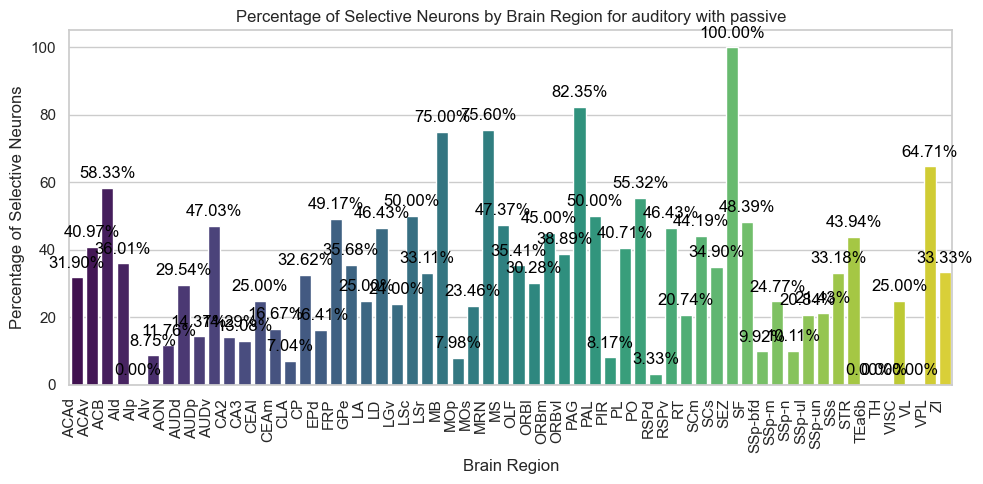

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


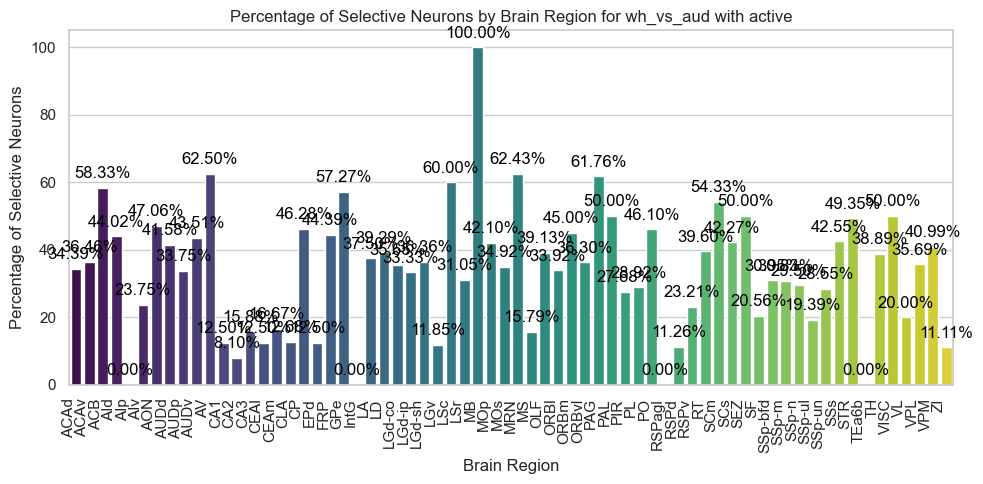

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


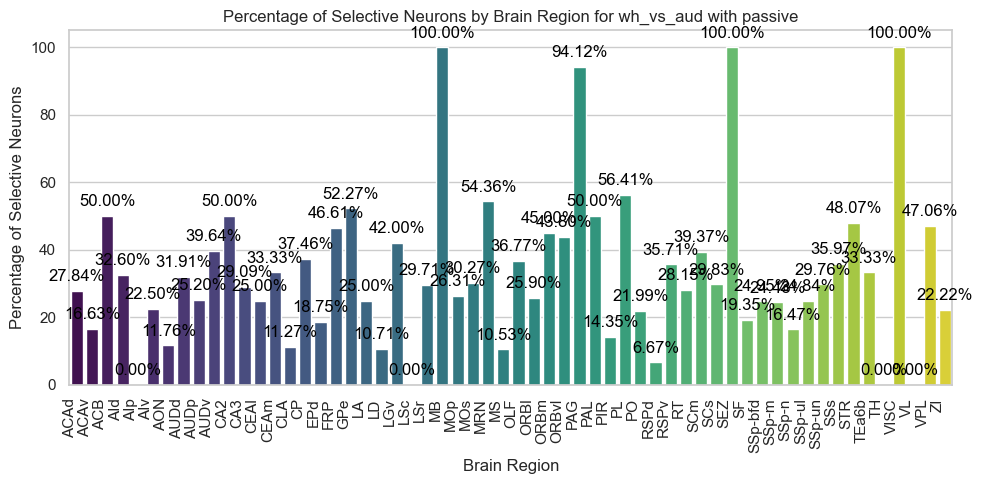

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/4113417211.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')


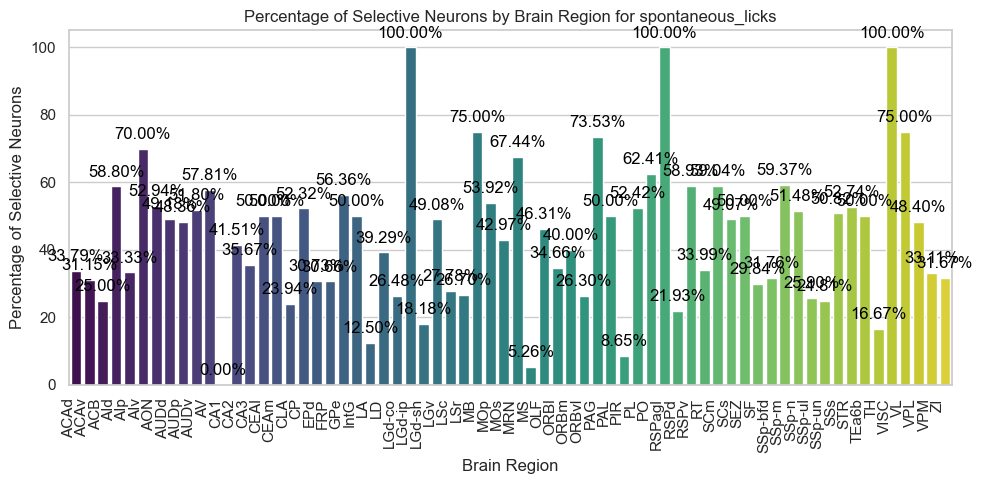

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_avg_selective_neuron_percentage(df, offset=2, category='whisker', context='active'):
    """
    Plots the average percentage of selective neurons per brain region across all mice.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - offset: Distance for percentage annotation above the bars (default=2).
    - category: Filter based on category (default='whisker').
    """
    if category == 'spontaneous_licks':
        # Filter by category and context
        df_filtered = df[(df['event'] == category)]

    else:
        df_filtered = df[(df['event'] == category) & (df['context'] == context)]
    
    # Drop NaN values in 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    percentages = df_filtered.groupby(['mouse_id', 'area_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    # Average percentages across mice for each brain region
    avg_percentages = percentages.groupby('area_acronym')['selective'].mean().reset_index()

    # Create the bar plot
    plt.figure(figsize=(10, 5))  # Set figure size
    ax = sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis')

    # Add annotations to the bars
    for i, row in avg_percentages.iterrows():
        ax.text(i, row['selective'] + 2, f"{row['selective']:.2f}%", ha='center', va='bottom', color='black')

    title = f"Percentage of Selective Neurons by Brain Region for {category}" if category=='spontaneous_licks' else f"Percentage of Selective Neurons by Brain Region for {category} with {context}"

    # Set plot titles and labels
    plt.title(title)
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Tight layout to ensure everything fits without overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()


plot_avg_selective_neuron_percentage(df, offset=2, category='whisker', context='passive')
plot_avg_selective_neuron_percentage(df, offset=2, category='whisker', context='active')

plot_avg_selective_neuron_percentage(df, offset=2, category='auditory', context='active')
plot_avg_selective_neuron_percentage(df, offset=2, category='auditory', context='passive')

plot_avg_selective_neuron_percentage(df, offset=2, category='wh_vs_aud', context='active')
plot_avg_selective_neuron_percentage(df, offset=2, category='wh_vs_aud', context='passive')

plot_avg_selective_neuron_percentage(df, offset=2, category='spontaneous_licks')



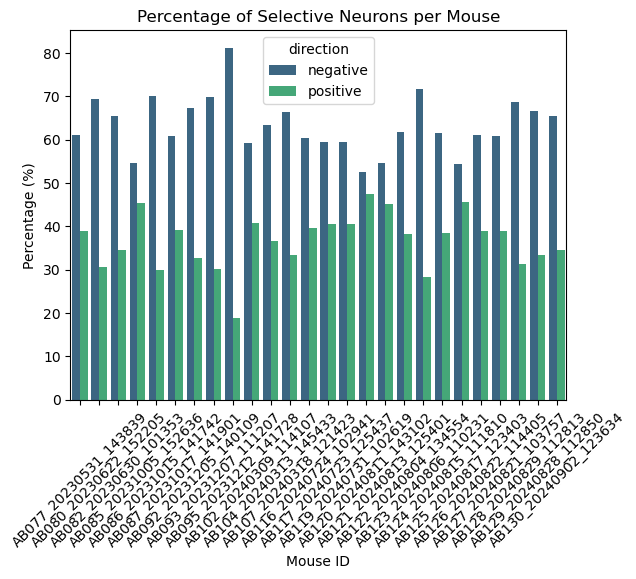

In [6]:
# Step 1: Calculate percentage of selective neurons per mouse_id and direction
selective_counts = df[df['selective'] == True].groupby(['mouse_id', 'direction']).size().reset_index(name='count')

# Step 2: Calculate total selective neurons per mouse_id
total_counts = selective_counts.groupby('mouse_id')['count'].sum().reset_index(name='total')

# Step 3: Merge and calculate percentage
selective_percentages = selective_counts.merge(total_counts, on='mouse_id')
selective_percentages['percentage'] = (selective_percentages['count'] / selective_percentages['total']) * 100

# Step 4: Plot using Seaborn
sns.barplot(data=selective_percentages, x='mouse_id', y='percentage', hue='direction', palette='viridis')
plt.title('Percentage of Selective Neurons per Mouse')
plt.ylabel('Percentage (%)')
plt.xlabel('Mouse ID')
plt.xticks(rotation=45)
plt.show()


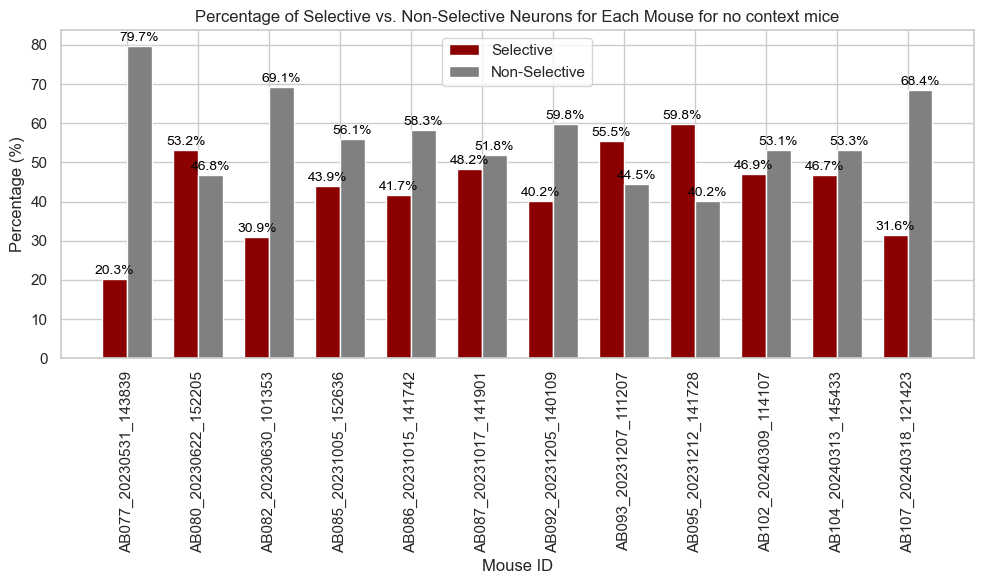

In [29]:
import matplotlib.pyplot as plt
import numpy as np

df_no_context = df[df['has context']==True]

# Grouping by mouse_id and counting the 'selective' values
selective_counts = df_no_context.groupby('mouse_id')['selective'].value_counts().unstack().fillna(0)

# Calculate the percentage of selective and non-selective neurons for each mouse
selective_percentage = selective_counts.div(selective_counts.sum(axis=1), axis=0) * 100

# Plotting all mice in the same graph with percentages
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions of the bars on the x-axis
bar_width = 0.35  # Bar width
index = np.arange(len(selective_counts))  # Bar positions

# Plotting Selective and Non-Selective bars for each mouse based on percentages
bar1 = ax.bar(index - bar_width / 2, selective_percentage[True], bar_width, label='Selective', color='darkred')
bar2 = ax.bar(index + bar_width / 2, selective_percentage[False], bar_width, label='Non-Selective', color='gray')

# Adding percentage labels on the bars
for i, (selective, non_selective) in enumerate(zip(selective_percentage[True], selective_percentage[False])):
    # Display percentage labels on the bars
    ax.text(index[i] - bar_width / 2, selective + 0.5, f'{selective:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Selective
    ax.text(index[i] + bar_width / 2, non_selective + 0.5, f'{non_selective:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Non-Selective

# Adding labels and title
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Selective vs. Non-Selective Neurons for Each Mouse for no context mice')
ax.set_xticks(index)
ax.set_xticklabels(selective_percentage.index, rotation=90)  # Rotate mouse_id labels vertically
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


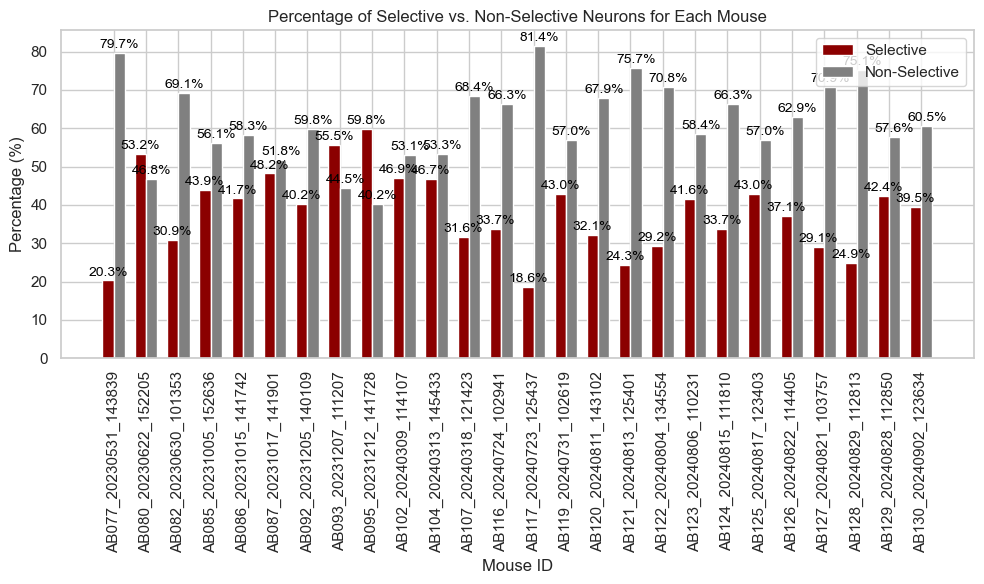

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_no_context = df[df['has context']==True]

# Grouping by mouse_id and counting the 'selective' values
selective_counts = df.groupby('mouse_id')['selective'].value_counts().unstack().fillna(0)

# Calculate the percentage of selective and non-selective neurons for each mouse
selective_percentage = selective_counts.div(selective_counts.sum(axis=1), axis=0) * 100

# Plotting all mice in the same graph with percentages
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions of the bars on the x-axis
bar_width = 0.35  # Bar width
index = np.arange(len(selective_counts))  # Bar positions

# Plotting Selective and Non-Selective bars for each mouse based on percentages
bar1 = ax.bar(index - bar_width / 2, selective_percentage[True], bar_width, label='Selective', color='darkred')
bar2 = ax.bar(index + bar_width / 2, selective_percentage[False], bar_width, label='Non-Selective', color='gray')

# Adding percentage labels on the bars
for i, (selective, non_selective) in enumerate(zip(selective_percentage[True], selective_percentage[False])):
    # Display percentage labels on the bars
    ax.text(index[i] - bar_width / 2, selective + 0.5, f'{selective:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Selective
    ax.text(index[i] + bar_width / 2, non_selective + 0.5, f'{non_selective:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Non-Selective

# Adding labels and title
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Selective vs. Non-Selective Neurons for Each Mouse for both contexts')
ax.set_xticks(index)
ax.set_xticklabels(selective_percentage.index, rotation=90)  # Rotate mouse_id labels vertically
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Specific barplots we wanted to visualize

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
/var/folders/

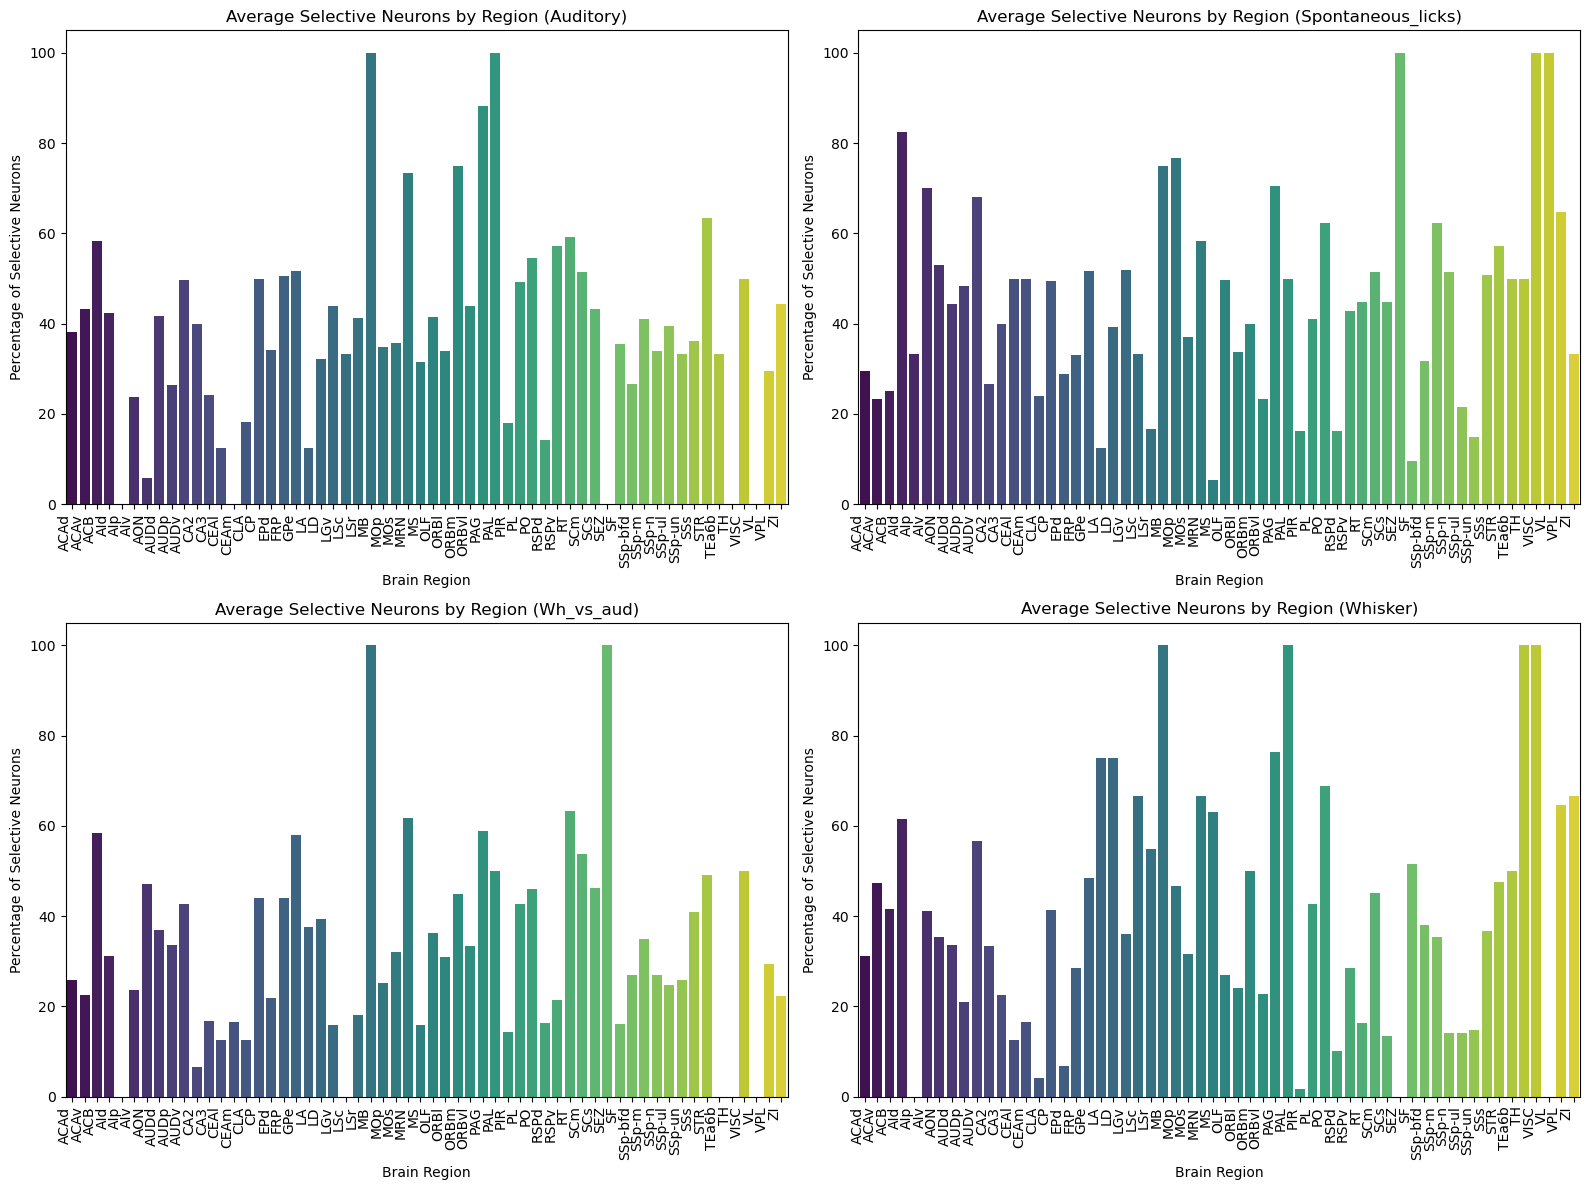

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### This function plots the selectivess per event to visualize (for each dfferent event)
def plot_avg_selective_by_event(df, context='active', has_context = 0):
    ### has_context = True for all mice_data >= 116, False for <=, 0 if we include both
    """ 
    Proceed like the previous functions
    """

    if has_context!=True or has_context!=False:
        df = df[df['has context'] == has_context]
        

    df_filtered = df[df['context'] == context]

    # Group by area_acronym and event, then calculate average selective percentage
    avg_percentages = df_filtered.groupby(['area_acronym', 'event'])['selective'].mean().reset_index()
    
    avg_percentages['selective'] *= 100  

    events = avg_percentages['event'].unique() # each event wh, aud, wh vs aud and spontaneous_licks

    # Create subplots for each event type
    plt.figure(figsize=(16, 12))
    
    for idx, event in enumerate(events, 1):
        event_data = avg_percentages[avg_percentages['event'] == event]
        
        # Create a subplot for this event
        plt.subplot(2, len(events)//2 + len(events)%2, idx)
        ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
        ax.set_title(f'Average Selective Neurons by Region ({event.capitalize()})')
        ax.set_xlabel('Brain Region')
        ax.set_ylabel('Percentage of Selective Neurons')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

    plt.tight_layout()
    plt.show()

plot_avg_selective_by_event(df, context='active', has_context=False)


/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
/var/folders/

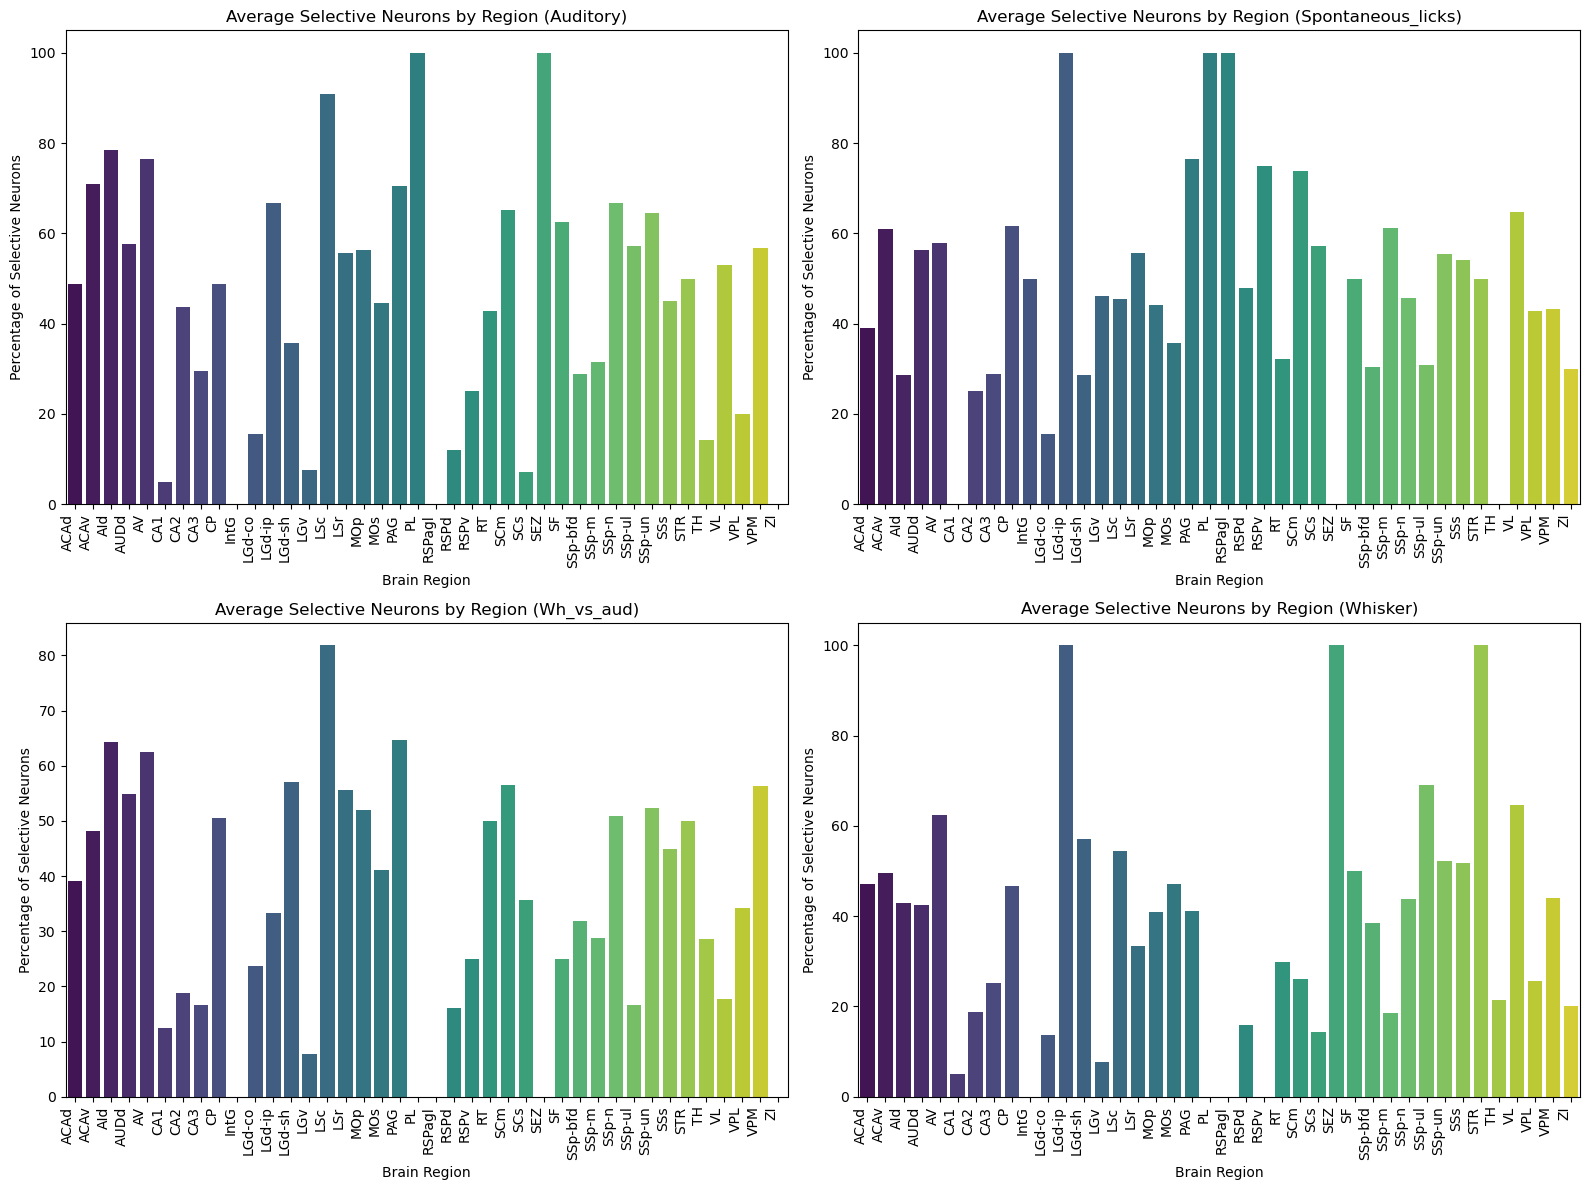

In [9]:
plot_avg_selective_by_event(df, context='active', has_context=True)

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/3298871621.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='area_acronym', y='selective', data=event_data, palette='viridis')
/var/folders/

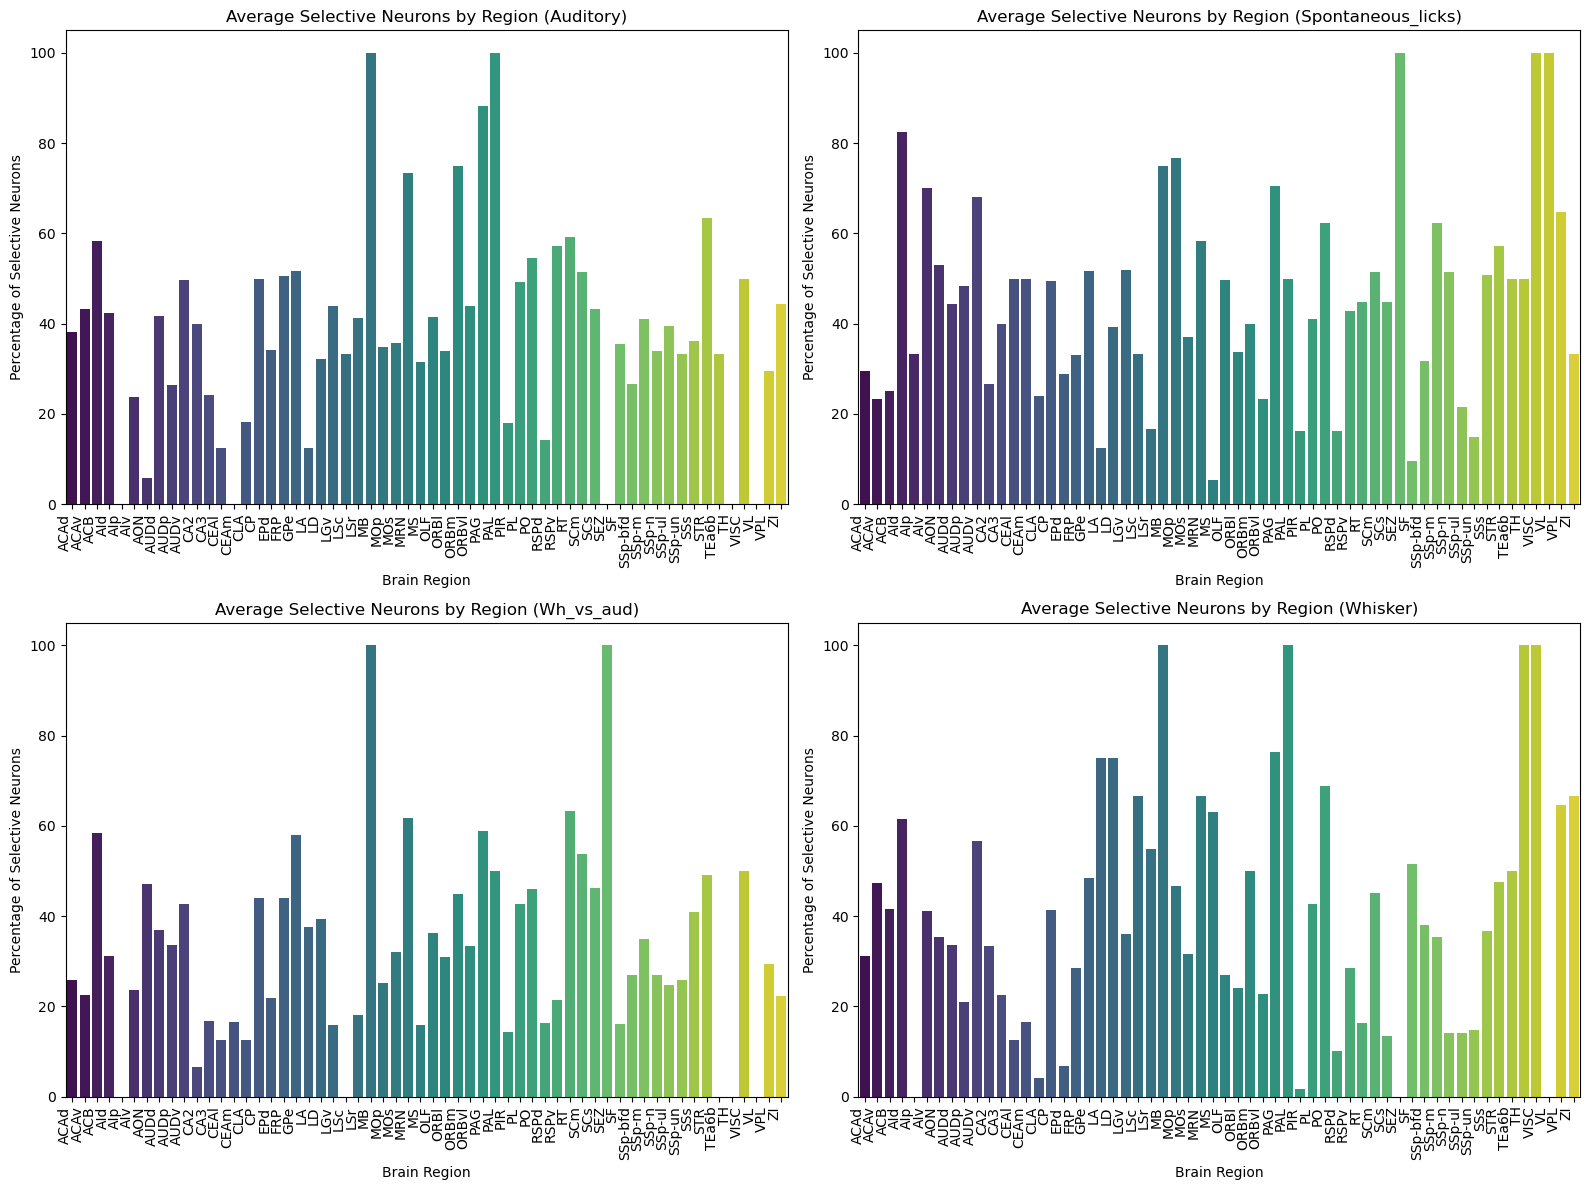

In [10]:
plot_avg_selective_by_event(df, context='active', has_context=0)

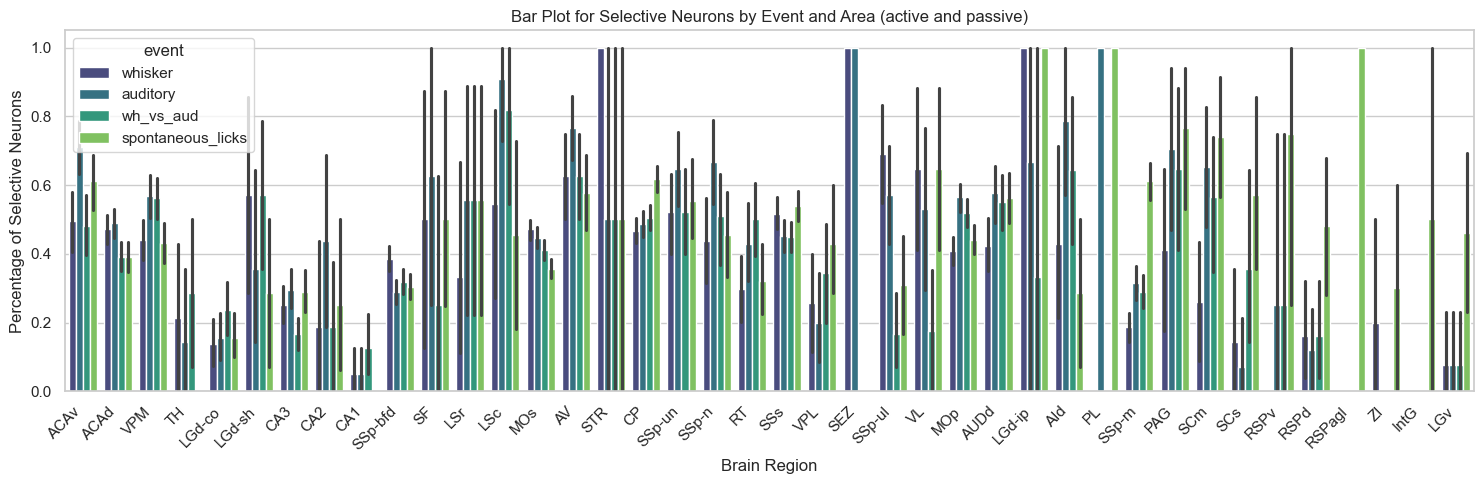

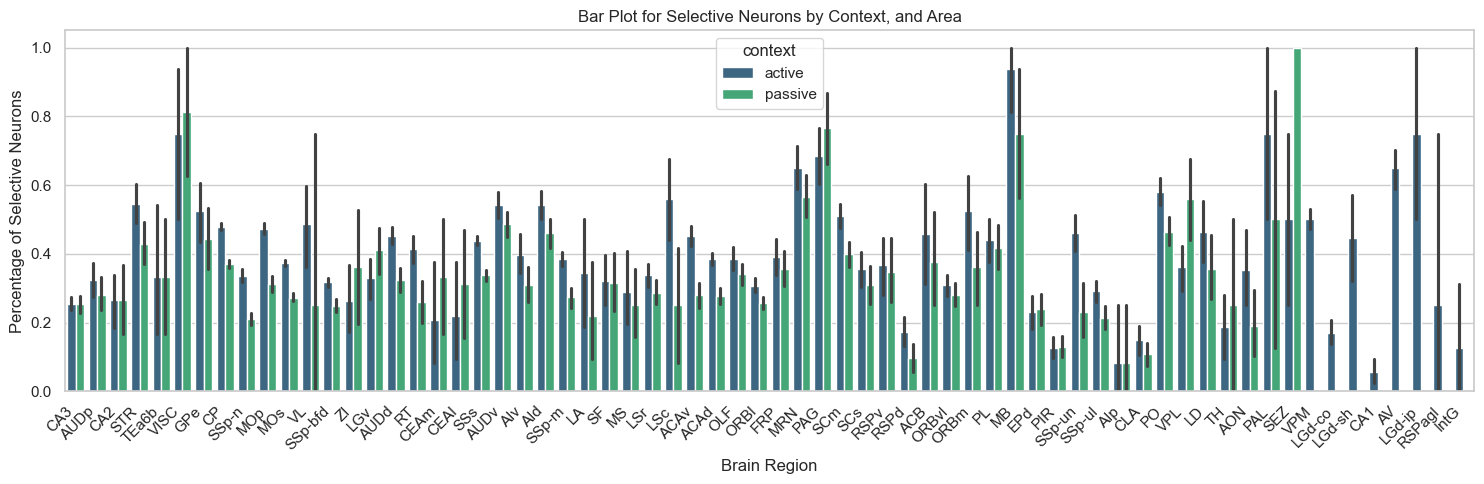

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="whitegrid")

def plot_by_event(df, has_context = 0):
    if has_context != 0:
        df = df[df['has context'] == has_context]
        title = 'Bar Plot for Selective Neurons by Event and Area (active and passive)' if has_context else 'Bar Plot for Selective Neurons by Event and Area (active)'
    else:
        title = 'Bar Plot for Selective Neurons by Event and Area'
    plt.figure(figsize=(15, 5))
    sns.barplot(x='area_acronym', y='selective', hue='event', data=df, palette='viridis')
    plt.title(title)
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def plot_by_context(df):
    plt.figure(figsize=(15, 5))
    sns.barplot(x='area_acronym', y='selective', hue='context', data=df, palette='viridis')
    plt.title('Bar Plot for Selective Neurons by Context, and Area')
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_by_event(df, True)  
plot_by_context(df) 

In [12]:
df.columns.tolist()

['cluster_id',
 'ccf_acronym',
 'ccf_name',
 'ccf_parent_id',
 'ccf_parent_acronym',
 'ccf_parent_name',
 'spike_times',
 'mouse_id',
 'context',
 'event',
 'pre_spikes',
 'post_spikes',
 'AUC',
 'Transformed AUC',
 'p-values positive',
 'p-values negative',
 'selective',
 'direction',
 'pre_time',
 'post_time',
 'area_acronym',
 'has context']

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/1556480512.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


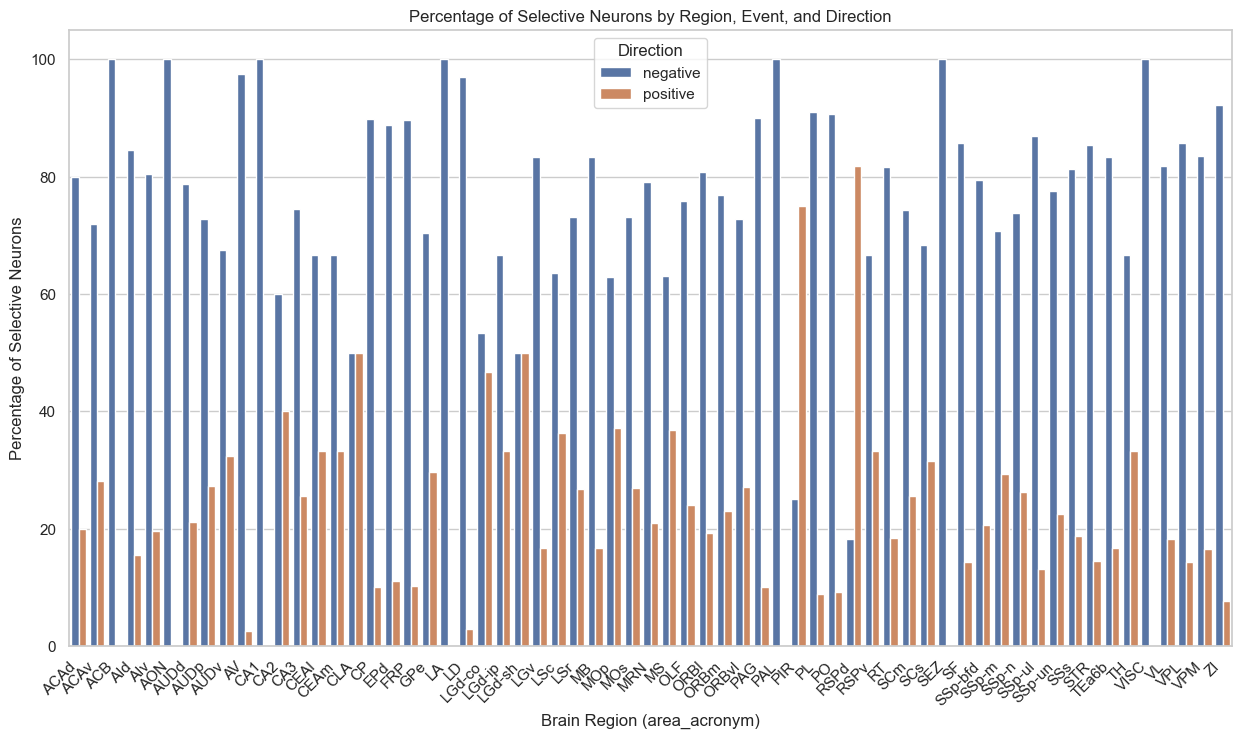

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter selective neurons
selective_df = df[df['selective']]
selective_df = selective_df[selective_df['event']=='whisker']
# Group by area, event, and direction, and count the number of selective neurons
grouped = selective_df.groupby(['area_acronym', 'direction']).size().reset_index(name='count')

# Calculate total neurons per area and event to get the percentage
total_per_group = selective_df.groupby(['area_acronym']).size().reset_index(name='total')
merged_df = pd.merge(grouped, total_per_group, on=['area_acronym'])
merged_df['percentage'] = (merged_df['count'] / merged_df['total']) * 100

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(
    data=merged_df,
    x='area_acronym',
    y='percentage',
    hue='direction',
    ci=None
)
plt.title('Percentage of Selective Neurons by Region, Event, and Direction')
plt.xlabel('Brain Region (area_acronym)')
plt.ylabel('Percentage of Selective Neurons')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Direction')
plt.show()


/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/2294176390.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/2294176390.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


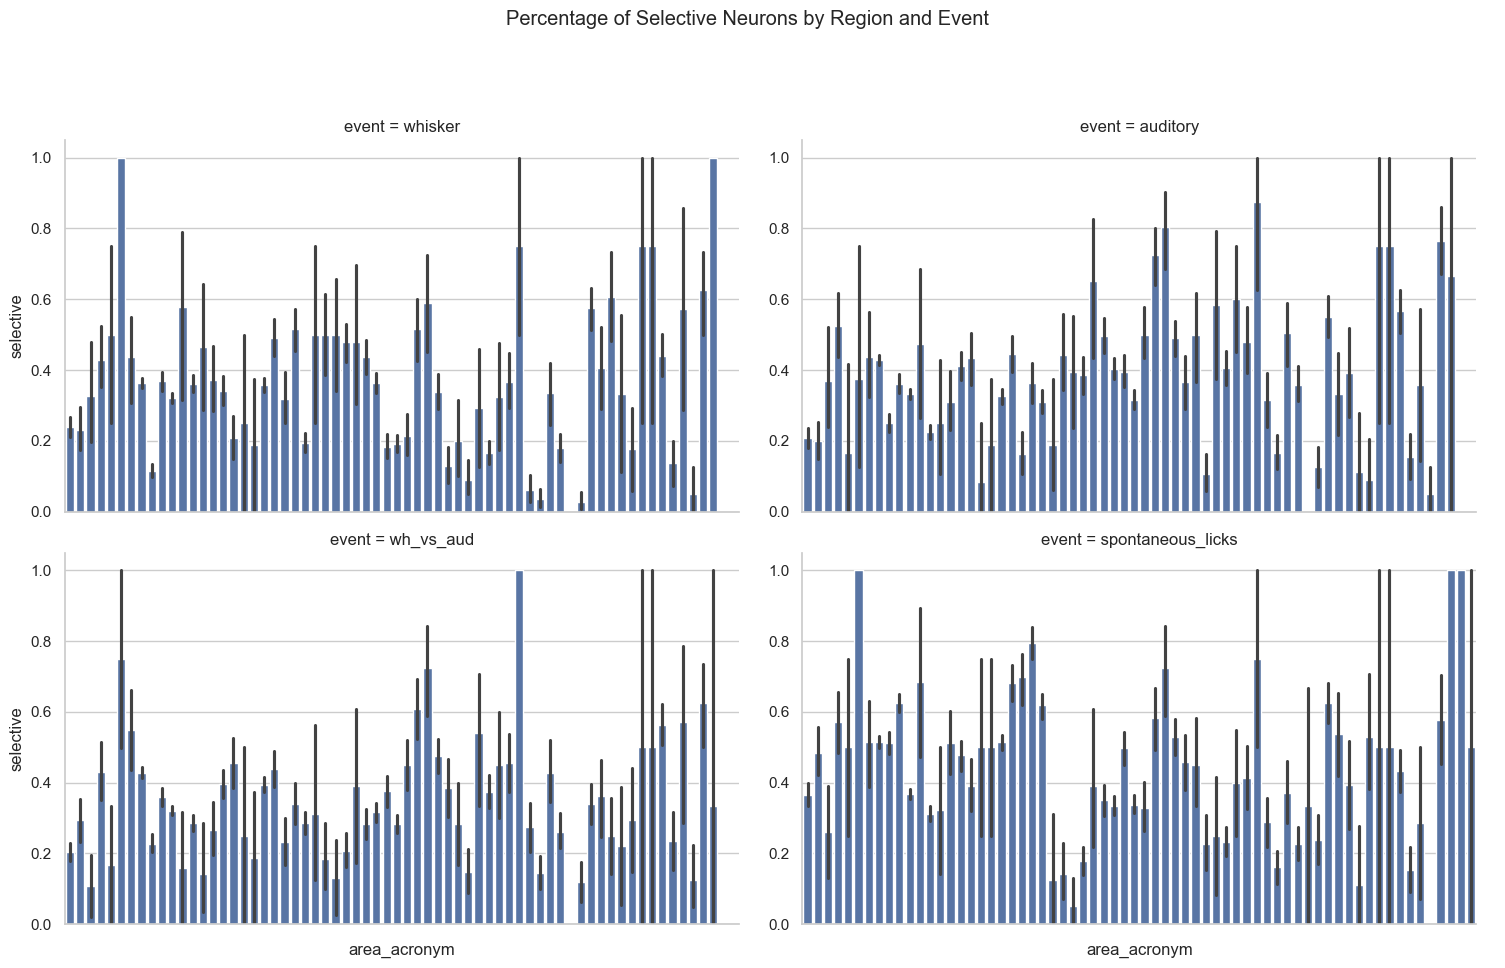

In [14]:
g = sns.catplot(
    df, kind="bar",
    x="area_acronym", y="selective", col="event",
    height=5, aspect=1.5, col_wrap=2,  # Increased aspect ratio and wrapped columns
    sharey=False  # Allow each subplot to have its own y-axis scale
)

# Adjust titles and spacing
g.fig.subplots_adjust(top=0.85)  # Adjust top margin for title
g.fig.suptitle('Percentage of Selective Neurons by Region and Event')  # Overall title

# Rotate x-axis labels for each subplot
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

/Users/shrinidhivelan/miniconda3/envs/Lsens_SP/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


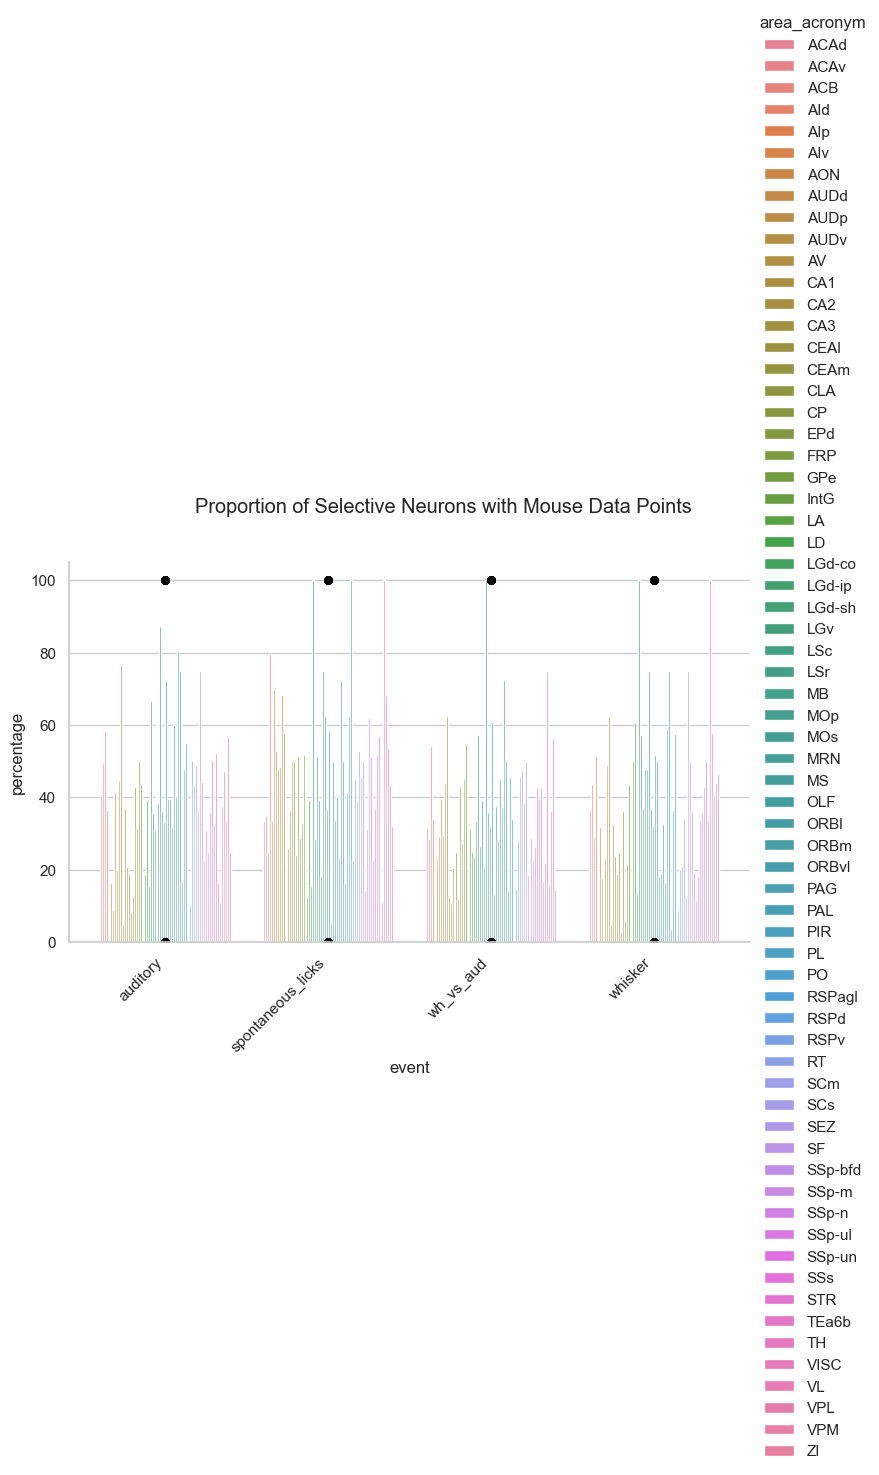

In [15]:
total_neurons = df.groupby(['event', 'area_acronym']).size().reset_index(name='total_count')
selective_neurons = df[df['selective']].groupby(['event', 'area_acronym']).size().reset_index(name='selective_count')
merged_df = pd.merge(total_neurons, selective_neurons, on=['event', 'area_acronym'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['selective_count'] / merged_df['total_count']) * 100

# Plot with bar plot and mouse dots
g = sns.catplot(
    data=merged_df, kind="bar",
    x="event", y="percentage", hue="area_acronym",
    height=5, aspect=1.5, sharey=False
)

# Add scatter plot with individual mouse data points
for i, (event, group) in enumerate(df.groupby('event')):
    # Plotting the dots for each mouse_id in the respective event
    for _, row in group.iterrows():
        plt.plot(event, row['selective'] * 100, marker='o', markersize=5, color='black')  # Dots for individual mice

# Adjust titles and spacing
g.fig.subplots_adjust(top=0.85)  # Adjust top margin for title
g.fig.suptitle('Proportion of Selective Neurons with Mouse Data Points')  # Overall title

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74158/2722585281.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area_acronym', y='selective', hue='event', data=df, palette='viridis', ci=None)


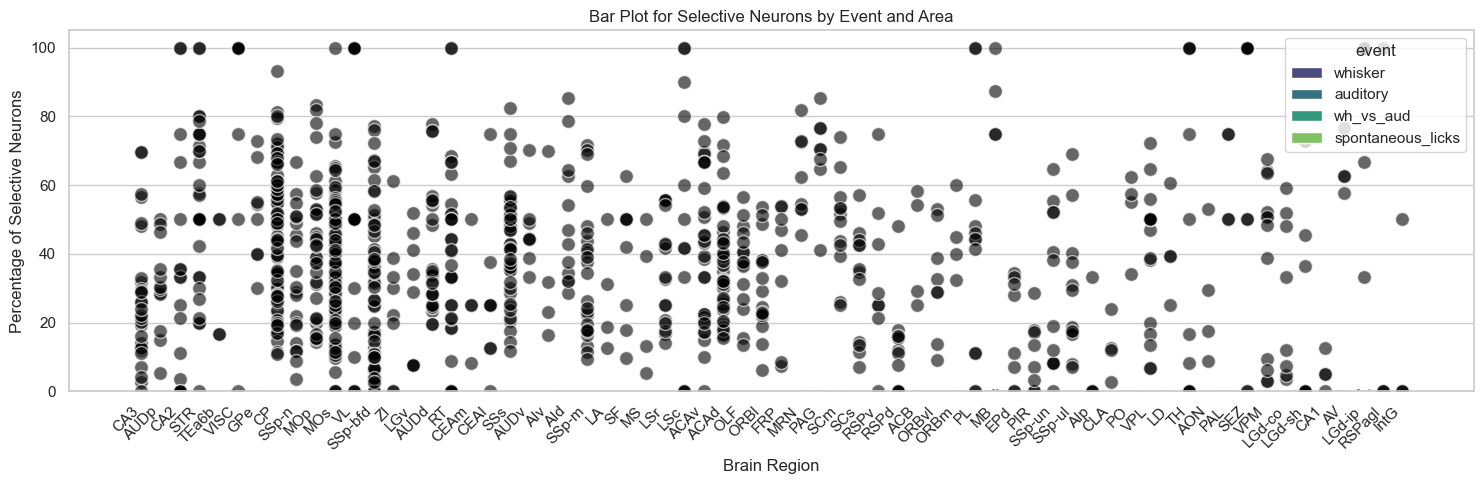

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_by_event_dots(df, has_context=0):
    # Filter by context if applicable
    if has_context != 0:
        df = df[df['has context'] == has_context]
        title = 'Bar Plot for Selective Neurons by Event and Area (active and passive)' if has_context else 'Bar Plot for Selective Neurons by Event and Area (active)'
    else:
        title = 'Bar Plot for Selective Neurons by Event and Area'
    
    plt.figure(figsize=(15, 5))

    # Bar plot for percentage of selective neurons
    sns.barplot(x='area_acronym', y='selective', hue='event', data=df, palette='viridis', ci=None)

    # Calculate the percentage of selective neurons per mouse
    mouse_percentage = df.groupby(['area_acronym', 'event', 'mouse_id'])['selective'].mean().reset_index()
    mouse_percentage['percentage'] = mouse_percentage['selective'] * 100  # Convert to percentage

    # Plot dots for each mouse_id
    for _, row in mouse_percentage.iterrows():
        plt.scatter(x=row['area_acronym'], y=row['percentage'], color='black', s=100, alpha=0.6, edgecolor='white')

    # Customize plot
    plt.title(title)
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_by_event_dots(df)
